# Ran Yan PWD Assessment 

## Case
The drop coffee roasters in stockholm is a popular place for people who like speciality coffee and also prefer to purchase sustainable coffee beans. The drop coffee roastery always offer a lot of information about the farmers of each kind of coffee on their website. This year, in order to enhance their image of caring about coffee farmers as well as sustainable coffee roastery, their webdesginer want to change the product image for each coffee from product package into the photos of the coffee farmers, from which the coffee come from. 

In [ ]:
! pip install scipy


In [ ]:
! pip install matplotlib

In [2]:
# Import packages
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib as inline
%matplotlib inline

## Population Simulation

In [115]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters for the power-law distribution for each variable in old version (Variant A) with the picture of the pakage
# "clicks" regards to the click users made by clicking on the product images in the general coffee to come into one specific coffee product page.
clicks_shape_A = 0.5
add_to_cart_shape_A = 0.4
page_view_A = 0.45
order_shape_A= 0.2
revenue_shape_A= 0.4

# Generate synthetic data for each variable in old version (Variant A)
population_size = 5000
population_A = pd.DataFrame()
population_A['user_id']=np.arange(1,population_size+1)
population_A['acquisition_channels'] = np.random.choice(['Organic', 'Paid', 'Referral'], size=population_size)
population_A['clicks_data'] = 10*stats.powerlaw.rvs(clicks_shape_A, size=population_size)
population_A['page_view']=12*stats.powerlaw.rvs(page_view_A, size=population_size)
population_A['number of add_to_cart'] = 10*stats.powerlaw.rvs(add_to_cart_shape_A, size=population_size)
population_A['number of order'] = 10*stats.powerlaw.rvs(order_shape_A, size=population_size)
population_A ['revenue']= 1800*stats.powerlaw.rvs(revenue_shape_A, size=population_size)

# Simulate new and old users based on 'User ID'
new_user_threshold = 3200  # Assume user IDs below this threshold are considered new users

population_A['User_type'] = np.where(population_A['user_id'] <= new_user_threshold, 'New', 'Old')

# round the colomuns 
population_A['clicks_data'] = population_A['clicks_data'].round(0)
population_A['page_view'] = population_A['page_view'].round(0)
population_A['number of add_to_cart'] = population_A['number of add_to_cart'].round(0)
population_A['number of order'] = population_A['number of order'].round(0)
population_A['revenue'] =population_A['revenue'].round(2)

# Ensure that if 'number_of_orders' is 0, 'revenue' is also set to 0
population_A.loc[population_A['number of order'] == 0,'revenue'] = 0


# Define parameters for the power-law distribution for each variable in new version (Variant B) with the picture of the coffee farmer
clicks_shape_B = 0.68
page_view_B = 0.53
add_to_cart_shape_B = 0.32
order_shape_B= 0.30
revenue_shape_B= 0.50

# Generate synthetic data for each variable in new version (Variant B)
population_B = pd.DataFrame()
population_B['user_id']=np.arange(1,population_size+1)
population_B['acquisition_channels'] = np.random.choice(['Organic', 'Paid', 'Referral'], size=population_size)
population_B['clicks_data'] = 10*stats.powerlaw.rvs(clicks_shape_B, size=population_size)
population_B['page_view']=12*stats.powerlaw.rvs(page_view_B, size=population_size)
population_B['number of add_to_cart'] = 10*stats.powerlaw.rvs(add_to_cart_shape_B, size=population_size)
population_B['number of order'] = 10*stats.powerlaw.rvs(order_shape_B, size=population_size)
population_B ['revenue']= 1800*stats.powerlaw.rvs(revenue_shape_B, size=population_size)

# Simulate new and old users based on 'User ID'
new_user_threshold = 2800  # Assume user IDs below this threshold are considered new users

population_B['User_type'] = np.where(population_B['user_id'] <= new_user_threshold, 'New', 'Old')

# round the colomuns 
population_B['clicks_data'] = population_B['clicks_data'].round(0)
population_A['page_view'] = population_B['page_view'].round(0)
population_B['number of add_to_cart'] = population_B['number of add_to_cart'].round(0)
population_B['number of order'] = population_B['number of order'].round(0)
population_B['revenue'] =population_B['revenue'].round(2)

# Ensure that if 'number_of_orders' is 0, 'revenue' is also set to 0
population_B.loc[population_B['number of order'] == 0, 'revenue'] = 0


# Display the first few rows of the population of Variant A and Variant B
print(population_A.head())
print(population_B.head())

   user_id acquisition_channels  clicks_data  page_view   
0        1             Referral          0.0        0.0  \
1        2              Organic          0.0        1.0   
2        3             Referral          5.0        3.0   
3        4             Referral          1.0        8.0   
4        5              Organic          4.0        1.0   

   number of add_to_cart  number of order  revenue User_type  
0                    6.0              0.0     0.00       New  
1                    1.0              1.0   418.20       New  
2                    4.0              0.0     0.00       New  
3                    3.0              0.0     0.00       New  
4                    0.0              2.0     5.62       New  
   user_id acquisition_channels  clicks_data  page_view   
0        1                 Paid          8.0   0.202213  \
1        2              Organic          1.0   0.797838   
2        3             Referral          0.0   2.611812   
3        4              Organic

## Sampling

In [116]:
# Sampling
sample_size = 1000
sample_A= population_A.sample(n=sample_size)
sample_B = population_B.sample(n=sample_size)


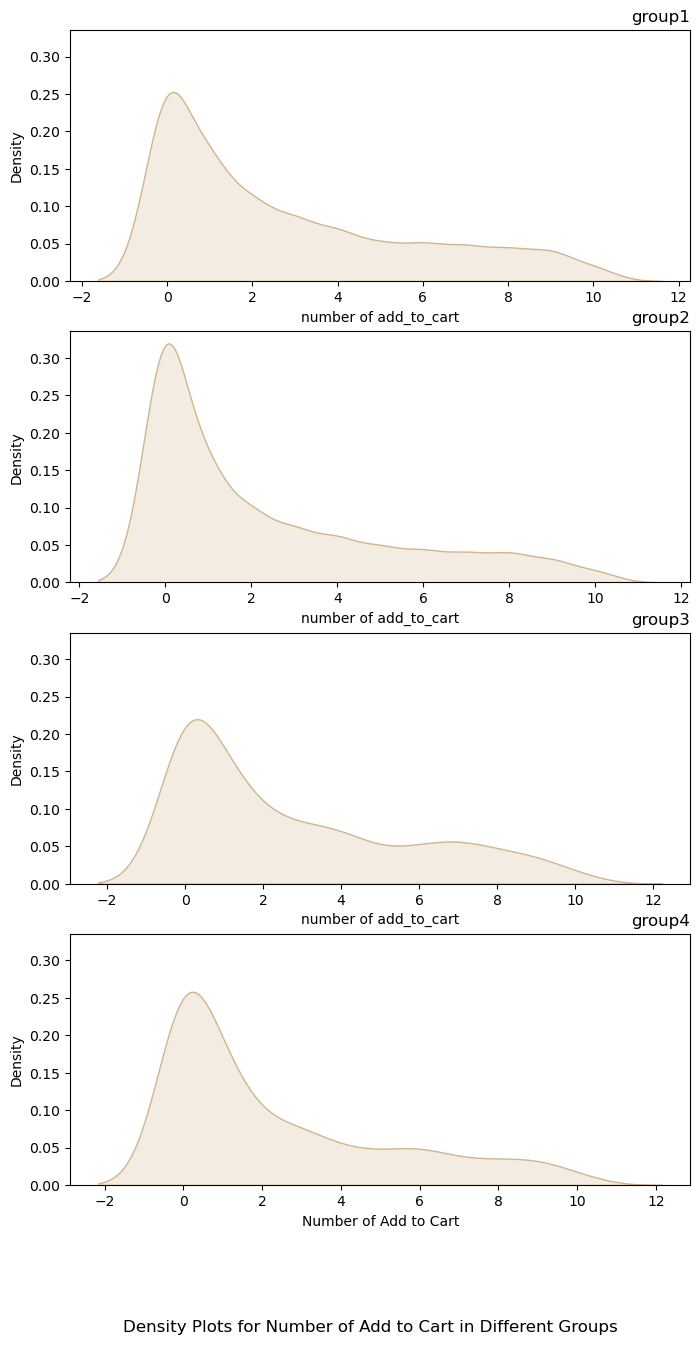

In [117]:
#plt the distribution of number of order 
groups = [population_A, population_B, sample_A, sample_B]

fig, axs = plt.subplots(len(groups), 1, figsize=(8,15), sharey=True)

for i, group in enumerate(groups):
    sns.kdeplot(ax=axs[i], data=group, x='number of add_to_cart', fill=True, color='tan')
    axs[i].set_title(f'group{i+1}',loc='right')
# Adding labels and title
plt.xlabel('Number of Add to Cart')
plt.ylabel('Density')
plt.suptitle('Density Plots for Number of Add to Cart in Different Groups', y=0.02)


# Show the plot
plt.show()

### 1. Primary Metric
#### 1.1 Number of add_to_cart

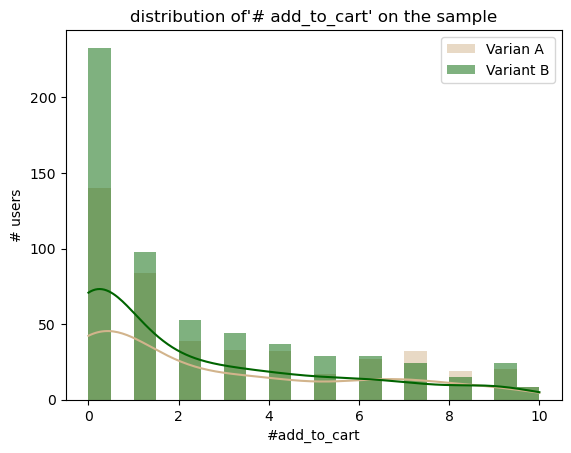


    The average number of add_to_cart is 2.82 in Sample A and 2.34 in Sample  B. Is that difference statistically significant?
    


In [123]:
#sns plot
ax=sns.histplot(data=sample_A, x=sample_A['number of add_to_cart'], bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=sample_B, x=sample_B['number of add_to_cart'], bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('#add_to_cart')
plt.ylabel('# users')
plt.title("distribution of'# add_to_cart' on the sample")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average number of add_to_cart is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A['number of add_to_cart'].mean(), 
        sample_B['number of add_to_cart'].mean()
    )
)

/var/folders/n2/9j4xx77j44l4gmw8mnp64qc00000gn/T/ipykernel_46856/2394757399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='number of add_to_cart', data=pd.concat([sample_A.assign(Group='DF1'), sample_B.assign(Group='DF2')]),width=0.4,showmeans=True,showfliers=True,palette='Blues')


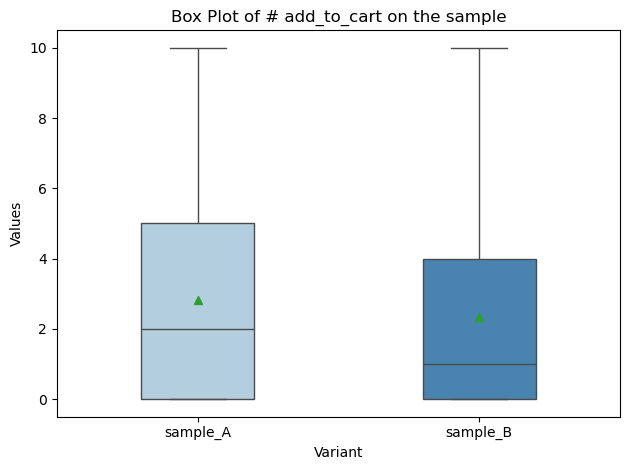

In [125]:
#sns boxplot
# Create a box plot using seaborn
sns.boxplot(x='Group', y='number of add_to_cart', data=pd.concat([sample_A.assign(Group='DF1'), sample_B.assign(Group='DF2')]),width=0.4,showmeans=True,showfliers=True,palette='Blues')

# Set labels and title
plt.xlabel('Variant')
plt.ylabel('Values')
plt.title('Box Plot of # add_to_cart on the sample')

# Customize x-axis ticks
plt.xticks([0, 1], ['sample_A', 'sample_B'])

plt.tight_layout()

# Show the plot
plt.show()

In [126]:
t_statistic, p_value=stats.ttest_ind( sample_A['number of add_to_cart'], sample_B['number of add_to_cart'], equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'reject the null hypothesis')

P_Value: 0.008029190375933908 T_statistics: 2.656539449550006 reject the null hypothesis


#### 1.2 Number of add_to_cart in old user and new user of website
##### As the change of the product image may have different impact on the user from different engagement level, which here especially for new users and old users. As the old users may be already familiar with the farmers images from previous purchase experience. Therefore trying to cheeck and avoid bias and representive problem here, also check if further similar experiment needed seperately on each engament level user group.

In [127]:
# the number of old users in Sample A 
sample_A[sample_A['User_type']=='Old'].count()

user_id                  153
acquisition_channels     153
clicks_data              153
page_view                153
number of add_to_cart    153
number of order          153
revenue                  153
User_type                153
revenue_per_order        153
dtype: int64

In [128]:
# the number of old users in Sample B 
sample_B[sample_B['User_type']=='Old'].count()

user_id                  256
acquisition_channels     256
clicks_data              256
page_view                256
number of add_to_cart    256
number of order          256
revenue                  256
User_type                256
revenue_per_order        256
dtype: int64

In [129]:
# define function to get the different user group 
def get_user_cart(sample,group):
    return sample[sample['User_type']==group]['number of add_to_cart']

##### Among Old User

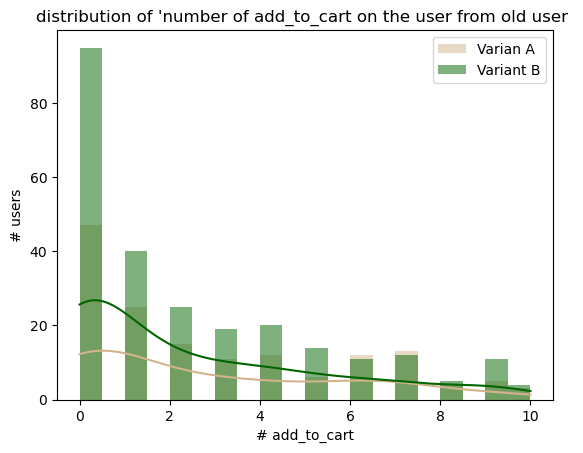


    The average number of add_to_cart is 2.85 in Sample A and 2.45 in Sample  B. Is that difference statistically significant?
    


In [130]:
#sns plot 'old user'
sample_A_old_add_to_cart=get_user_cart(sample_A, 'Old')
sample_B_old_add_to_cart=get_user_cart(sample_B, 'Old')
ax=sns.histplot(data=sample_A, x=sample_A_old_add_to_cart, bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=sample_B, x=sample_B_old_add_to_cart, bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('# add_to_cart')
plt.ylabel('# users')
plt.title("distribution of 'number of add_to_cart on the user from old user ")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average number of add_to_cart is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A_old_add_to_cart.mean(), 
        sample_B_old_add_to_cart.mean()
    )
)

In [131]:
# perform Welch's two sample t-test
t_statistic, p_value=stats.ttest_ind( sample_A_old_add_to_cart, sample_B_old_add_to_cart, equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'reject the null hypothesis')

P_Value: 0.1733803842005468 T_statistics: 1.364557572213469 fail to reject the null hypothesis


##### Among new User

In [149]:
sample_A[sample_A['User_type']=='New'].count()

user_id                  298
acquisition_channels     298
clicks_data              298
page_view                298
number of add_to_cart    298
number of order          298
revenue                  298
User_type                298
revenue_per_order        298
dtype: int64

In [147]:

sample_B[sample_B['User_type']=='New'].count()

user_id                  338
acquisition_channels     338
clicks_data              338
page_view                338
number of add_to_cart    338
number of order          338
revenue                  338
User_type                338
revenue_per_order        338
dtype: int64

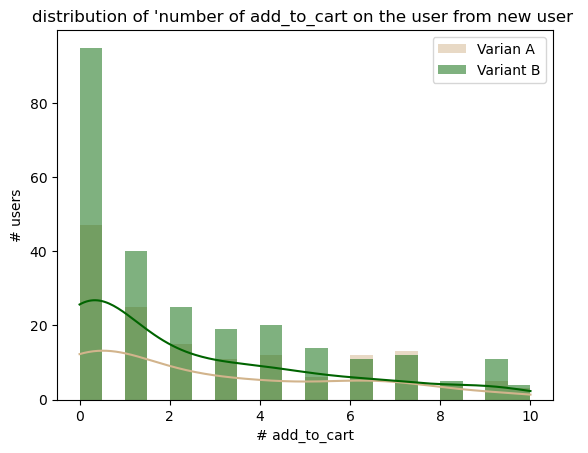


    The average number of add_to_cart is 2.81 in Sample A and 2.25 in Sample  B. Is that difference statistically significant?
    


In [132]:
#sns plot 'new user'
sample_A_new_add_to_cart=get_user_cart(sample_A, 'New')
sample_B_new_add_to_cart=get_user_cart(sample_B, 'New')
ax=sns.histplot(data=sample_A, x=sample_A_old_add_to_cart, bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=sample_B, x=sample_B_old_add_to_cart, bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('# add_to_cart')
plt.ylabel('# users')
plt.title("distribution of 'number of add_to_cart on the user from new user ")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average number of add_to_cart is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A_new_add_to_cart.mean(), 
        sample_B_new_add_to_cart.mean()
    )
)

In [133]:
# perform Welch's two sample t-test
t_statistic, p_value=stats.ttest_ind( sample_A_new_add_to_cart, sample_B_new_add_to_cart, equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'reject the null hypothesis')

P_Value: 0.01785639548954332 T_statistics: 2.375033866979945 reject the null hypothesis


### 2. Secondary Metric 
#### 2.1 clicks on the media all the users in samples

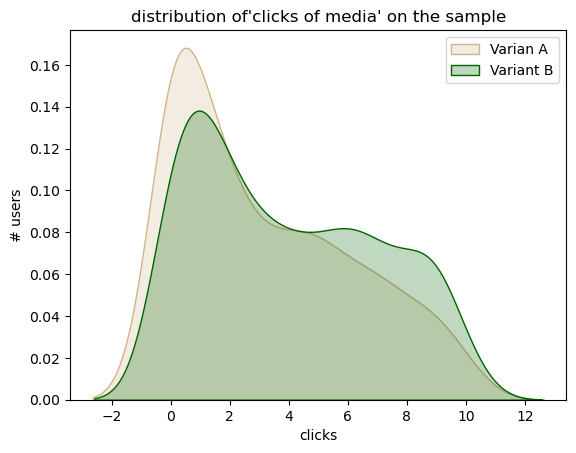


    The average Clicks is 3.20 in Sample A and 3.96 in Sample  B. Is that difference statistically significant?
    


In [140]:
#sns plot
ax=sns.kdeplot(data=sample_A, x=sample_A['clicks_data'],color='tan', label='Varian A',fill=True)
sns.kdeplot(data=sample_B, x=sample_B['clicks_data'], color='darkgreen', label='Variant B',fill=True)

# Set labels and title
plt.xlabel('clicks')
plt.ylabel('# users')
plt.title("distribution of'clicks of media' on the sample")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average Clicks is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A['clicks_data'].mean(), 
        sample_B['clicks_data'].mean()
    )
)

In [42]:
t_statistic, p_value=stats.ttest_ind( sample_A['clicks_data'], sample_B['clicks_data'], equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'reject the null hypothesis')


P_Value: 1.6194075757823848e-06 T_statistics: -4.810352593031544 reject the null hypothesis


#### 2.1.1 Number of clicks on the media in different acquisition channels
User from different acquisition channels may representa different sensitivity of sustainable image of their purchase behavior. As this background is lacking in our case, so dig a little bit into it by checking the sample seperately in each acquisition channels.

In [26]:
# define function to get the different acquisition channels 
def get_acquisition_channel_click(sample,channel):
    return sample[sample['acquisition_channels']==channel]['clicks_data']
        

##### Organic channels

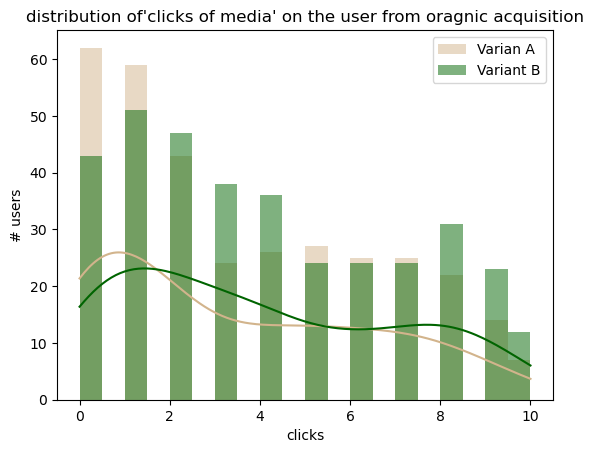


    The average Clicks is 3.45 in Sample A and 3.99 in Sample  B. Is that difference statistically significant?
    


In [30]:
#sns plot 'organic'
sample_A_organic_click=get_acquisition_channel_click(sample_A, 'Organic')
sample_B_organic_click=get_acquisition_channel_click(sample_B, 'Organic')
ax=sns.histplot(data=sample_A, x=sample_A_organic_click, bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=sample_B, x=sample_B_organic_click, bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('clicks')
plt.ylabel('# users')
plt.title("distribution of'clicks of media' on the user from oragnic channel")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average Clicks is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A_organic_click.mean(), 
        sample_B_organic_click.mean()
    )
)

In [33]:
t_statistic, p_value=stats.ttest_ind(sample_A_organic_click, sample_B_organic_click, equal_var=False)
if p_value >0.05:
   print(p_value, t_statistic,'fail to reject the null hypothesis')
else:
   print(p_value, t_statistic,'reject the null hypothesis')


0.017845772933982335 -2.3745389838298383 reject the null hypothesis


##### Paid channels

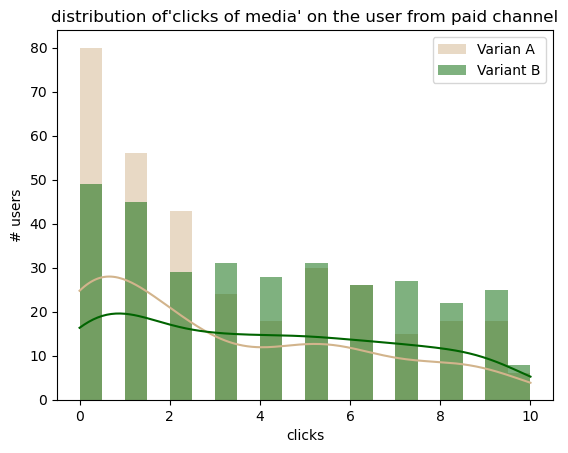


    The average Clicks is 3.18 in Sample A and 4.02 in Sample  B. Is that difference statistically significant?
    


In [34]:
#sns plot 'paid'
sample_A_paid_click=get_acquisition_channel_click(sample_A, 'Paid')
sample_B_paid_click=get_acquisition_channel_click(sample_B, 'Paid')
ax=sns.histplot(data=sample_A, x=sample_A_paid_click, bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=sample_B, x=sample_B_paid_click, bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('clicks')
plt.ylabel('# users')
plt.title("distribution of'clicks of media' on the user from paid channel")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average Clicks is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A_paid_click.mean(), 
        sample_B_paid_click.mean()
    )
)

In [35]:
t_statistic, p_value=stats.ttest_ind(sample_A_paid_click, sample_B_paid_click, equal_var=False)
if p_value >0.05:
   print(p_value, t_statistic,'fail to reject the null hypothesis')
else:
   print(p_value, t_statistic,'reject the null hypothesis')

0.0004509101895955467 -3.5263629303183515 reject the null hypothesis


##### Refferal channel

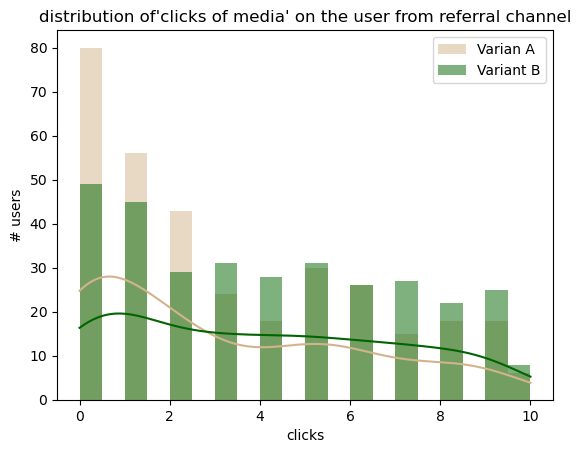


    The average Clicks is 3.40 in Sample A and 3.96 in Sample  B. Is that difference statistically significant?
    


In [36]:
#sns plot 'paid'
sample_A_referral_click=get_acquisition_channel_click(sample_A, 'Referral')
sample_B_referral_click=get_acquisition_channel_click(sample_B, 'Referral')
ax=sns.histplot(data=sample_A, x=sample_A_paid_click, bins=20, color='tan', label='Varian A', alpha=0.5,edgecolor='none',kde=True)
sns.histplot(data=sample_B, x=sample_B_paid_click, bins=20, color='darkgreen', label='Variant B', alpha=0.5,edgecolor='none',kde=True)

# Set labels and title
plt.xlabel('clicks')
plt.ylabel('# users')
plt.title("distribution of'clicks of media' on the user from referral channel")

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(
    """
    The average Clicks is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A_referral_click.mean(), 
        sample_B_referral_click.mean()
    )
)

In [38]:
t_statistic, p_value=stats.ttest_ind(sample_A_referral_click, sample_B_referral_click, equal_var=False)
if p_value >0.05:
   print(p_value, t_statistic,'fail to reject the null hypothesis')
else:
   print(p_value, t_statistic,'reject the null hypothesis')

0.016428260756476645 -2.4054632882428226 reject the null hypothesis


### 3. Guardrail metric 
#### 3.1 Revenue per order

In [118]:
# add one column revenue_per_order 
sample_A['revenue_per_order']=sample_A['revenue']/sample_A['number of order']
sample_B['revenue_per_order']=sample_B['revenue']/sample_B['number of order']


In [119]:
# get rid of NaN
sample_A=sample_A.dropna(subset=['revenue_per_order'])
sample_B=sample_B.dropna(subset=['revenue_per_order'])

/var/folders/n2/9j4xx77j44l4gmw8mnp64qc00000gn/T/ipykernel_46856/1696038266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='revenue_per_order', data=pd.concat([sample_A.assign(Group='DF1'), sample_B.assign(Group='DF2')]),width=0.4,showmeans=True,showfliers=True,palette='Blues')


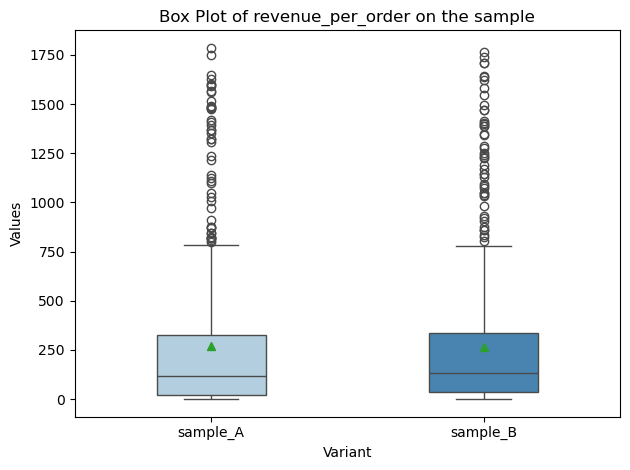


    The average revenue per order is 269.53 in Sample A and 263.67 in Sample  B. Is that difference statistically significant?
    


In [122]:
#sns boxplot
# Create a box plot using seaborn
sns.boxplot(x='Group', y='revenue_per_order', data=pd.concat([sample_A.assign(Group='DF1'), sample_B.assign(Group='DF2')]),width=0.4,showmeans=True,showfliers=True,palette='Blues')

# Set labels and title
plt.xlabel('Variant')
plt.ylabel('Values')
plt.title('Box Plot of revenue_per_order on the sample')

# Customize x-axis ticks
plt.xticks([0, 1], ['sample_A', 'sample_B'])

plt.tight_layout()

# Show the plot
plt.show()

print(
    """
    The average revenue per order is {:.2f} in Sample A and {:.2f} in Sample  B. Is that difference statistically significant?
    """.format( 
        sample_A['revenue_per_order'].mean(), 
        sample_B['revenue_per_order'].mean()
    )
)

In [121]:
# perform Welch's two sample t-test
t_statistic, p_value=stats.ttest_ind( sample_A['revenue_per_order'], sample_B['revenue_per_order'], equal_var=False)
if p_value >0.05:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'fail to reject the null hypothesis')
else:
   print("P_Value:",p_value, "T_statistics:",t_statistic,'reject the null hypothesis')

P_Value: 0.799744014897139 T_statistics: 0.2537517024370329 fail to reject the null hypothesis
